Nama : Anugerah Surya Atmaja - Naufal Fadli Muzakki - Zulfaa Dwi Oktavian

**Import Library**

In [1]:
#linear algebra
import numpy as np

#data processing
import pandas as pd
pd.set_option('display.max_columns', 25)

from datetime import datetime, timedelta

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

#for normalizing data
from sklearn.preprocessing import MinMaxScaler

#For Statistics
from sklearn.metrics import r2_score

#avoid warnings
import warnings
warnings.filterwarnings('ignore')

#to create nueral network
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, MultiHeadAttention, Input, Flatten, Concatenate, GRU
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras.callbacks import Callback

import tensorflow as tf
import tensorflow_addons as tfa

#setting the seed
import random
import tensorflow as tf

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


2024-08-15 21:15:55.955703: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 21:15:55.955988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 21:15:56.120249: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-15 21:15:56.401250: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-15 21:15:59.849059: W tensorflow/compiler/tf2

**Random State**

In [2]:
np.random.seed(123)
tf.random.set_seed(32)

***Eksplorasi Data***

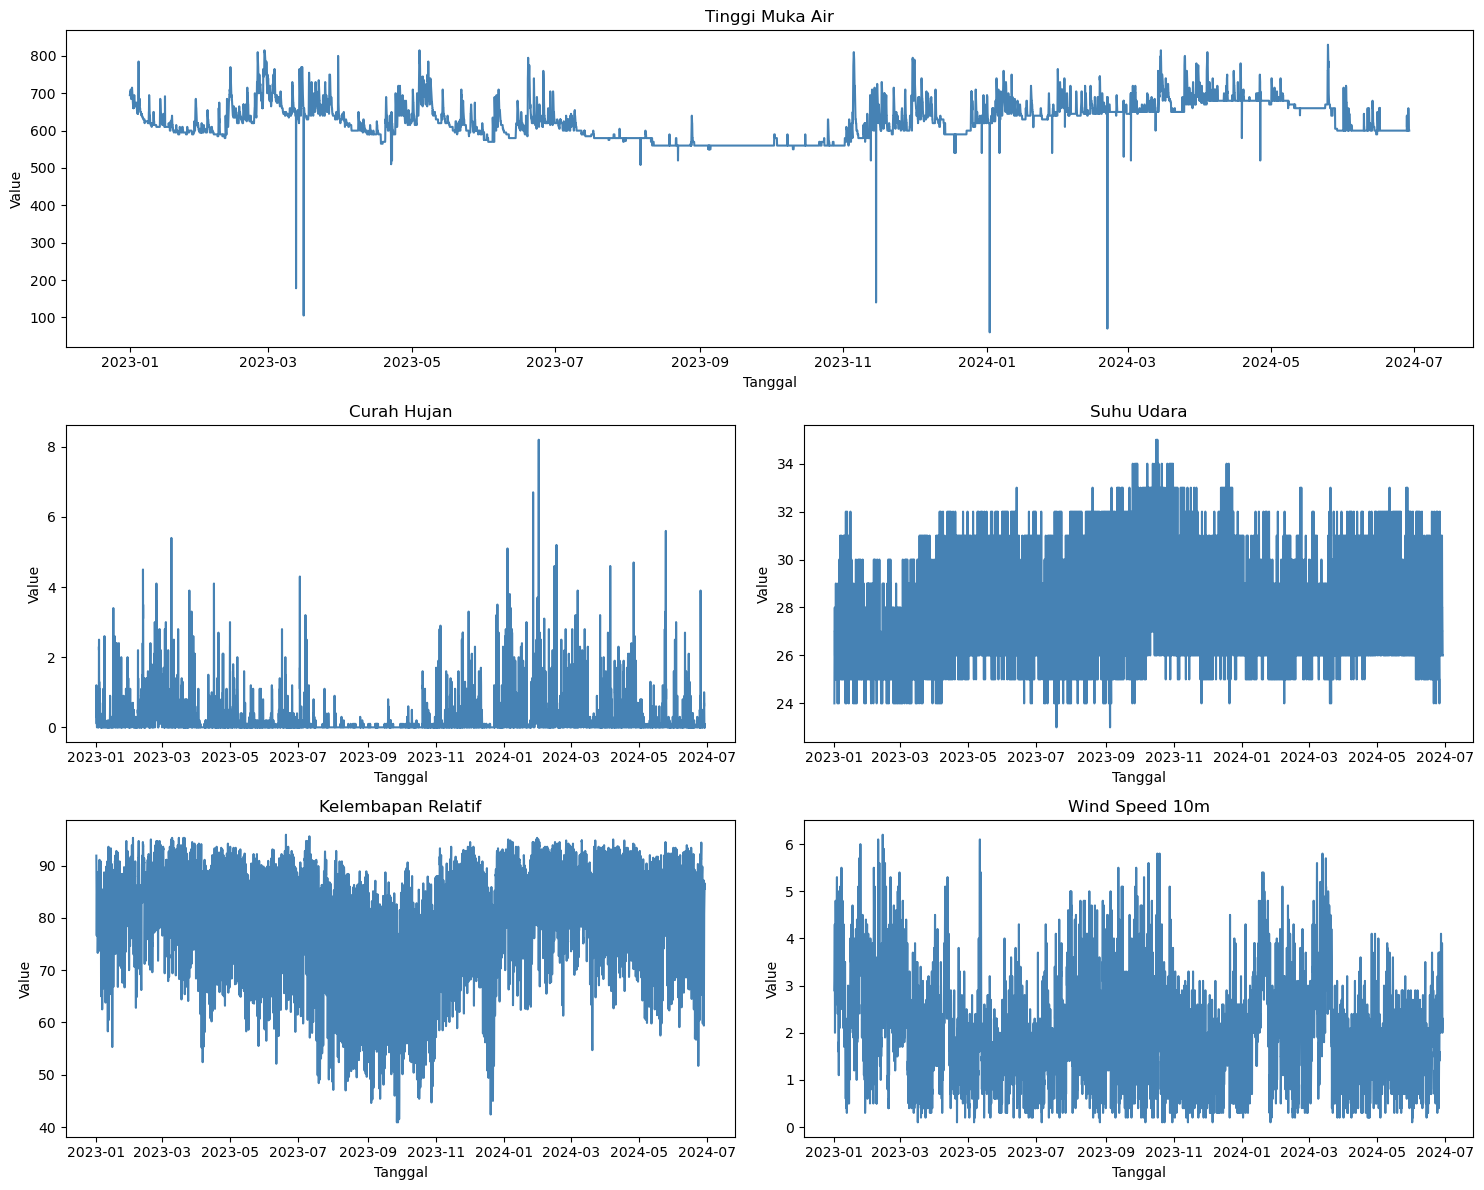

In [3]:
dataviz = pd.read_excel('Kode/DataSemnas6Var.xlsx', index_col='TanggalWaktu', parse_dates=True)
# Misalkan file Excel memiliki kolom: 'Date', 'Series1', 'Series2', 'Series3', 'Series4', 'Series5', 'Series6'
# Pastikan kolom 'Date' adalah kolom time series yang sesuai
dataviz['Tanggal'] = dataviz.index

# Menentukan nama variabel untuk setiap diagram garis
series1 = dataviz['Manggarai BKB']
series2 = dataviz['precipitation_rate']
series3 = dataviz['air_temp']
series4 = dataviz['relative_humidity']
series5 = dataviz['wind_speed_10m']

# Membuat subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 12))  # 3 baris, 2 kolom

# Plotting
# Plot untuk Tinggi Muka Air mengambil seluruh lebar baris pertama
axs[0, 0].remove()  # Hapus subplot di posisi (0, 0)
axs[0, 1].remove()  # Hapus subplot di posisi (0, 1)
ax = fig.add_subplot(3, 1, 1)  # Tambahkan subplot baru yang mengambil seluruh baris pertama
ax.plot(dataviz['Tanggal'].values, series1.values, label='Tinggi Muka Air', color='steelblue')
ax.set_title('Tinggi Muka Air')
ax.set(xlabel='Tanggal', ylabel='Value')

# Subplots lainnya
axs[1, 0].plot(dataviz['Tanggal'].values, series2.values, label='Curah Hujan', color='steelblue')
axs[1, 0].set_title('Curah Hujan')

axs[1, 1].plot(dataviz['Tanggal'].values, series3.values, label='Suhu Udara', color='steelblue')
axs[1, 1].set_title('Suhu Udara')

axs[2, 0].plot(dataviz['Tanggal'].values, series4.values, label='Kelembapan Relatif', color='steelblue')
axs[2, 0].set_title('Kelembapan Relatif')

axs[2, 1].plot(dataviz['Tanggal'].values, series5.values, label='Wind Speed 10m', color='steelblue')
axs[2, 1].set_title('Wind Speed 10m')

# Menambahkan label untuk sumbu x dan y untuk setiap subplot
for ax in axs.flat:
    ax.set(xlabel='Tanggal', ylabel='Value')

# Menambahkan layout agar tidak tumpang tindih
fig.tight_layout()

# Menampilkan grafik
plt.show()

Ringkasan Statistik

In [4]:
dataviz.iloc[:,1:].describe()

,Manggarai BKB,precipitable_water,precipitation_rate,air_temp,relative_humidity,wind_speed_10m,Tanggal
count,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081
mean,626.970721,58.027926,0.201269,27.807966,79.251372,1.923133,2023-09-30 12:00:00
min,60.000000,27.500000,0.000000,23.000000,40.900000,0.100000,2023-01-01 00:00:00
25%,590.000000,52.300000,0.000000,26.000000,72.000000,1.100000,2023-05-17 06:00:00
50%,620.000000,59.900000,0.000000,27.000000,81.500000,1.700000,2023-09-30 12:00:00
75%,660.000000,65.100000,0.200000,30.000000,88.400000,2.600000,2024-02-13 18:00:00
max,830.000000,80.300000,8.200000,35.000000,95.900000,6.200000,2024-06-29 00:00:00
std,50.094823,9.573697,0.474804,2.231441,10.910695,1.076509,NaN


Correlation Heatmap

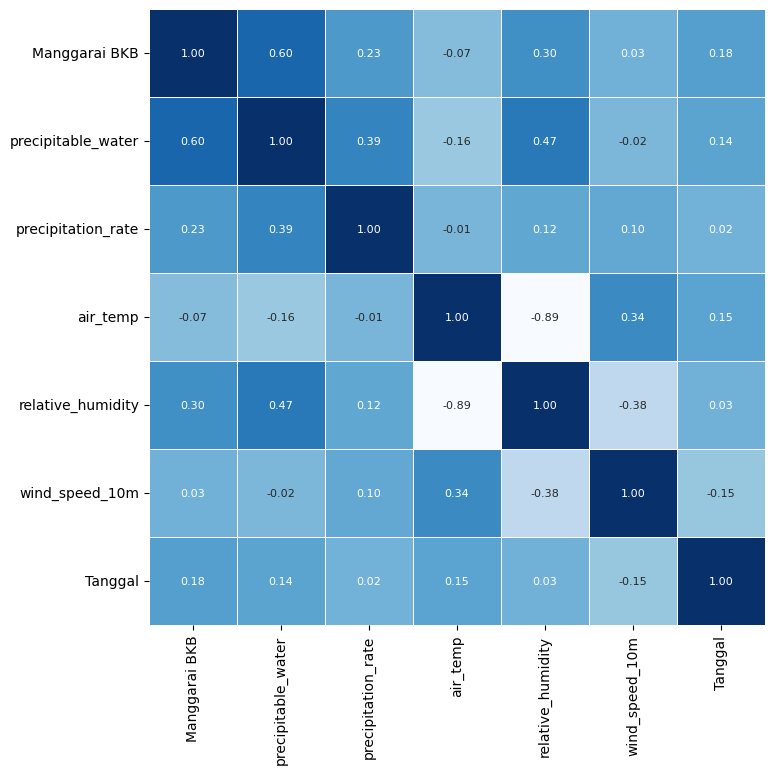

In [5]:
data_kor = dataviz.iloc[:,1:] # Membuat plotdata
# Menghitung matriks korelasi
corr = data_kor.corr()
# Membuat heatmap dengan penyesuaian estetika
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    linewidths=0.5,
    cbar=False,
    cbar_kws={"shrink": .8},  # Menyesuaikan ukuran colorbar
    square=True,  # Membuat setiap sel menjadi kotak
    annot_kws={"size": 8},  # Mengatur ukuran font anotasi
    linecolor='white'  # Warna garis batas antar sel
)

# Menambah judul dan mengatur ukuran font judul
#plt.title('Korelasi Variabel Penelitian', fontsize=16, pad=20)

# Mengatur label sumbu
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)

# Menampilkan heatmap
plt.show()

**Fungsi Bangun Model dengan Multi-Head Attention**

In [10]:
def build_model_att(train, valid, new_data, scaler, params, scaled_data_train, scaled_data_valid, name):
    
    class PrintBestValLossEpoch(Callback):
        def on_train_begin(self, logs=None):
            self.best_epoch = -1
            self.best_val_loss = float('inf')

        def on_epoch_end(self, epoch, logs=None):
            val_loss = logs.get('val_loss')
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.best_epoch = epoch
                print(f"New best validation loss at epoch {epoch + 1}: {val_loss:.4f}")
            
    #offset itu berfungsi untuk memberikan batasan nilai historis yang akan digunakan model sebagai informasi untuk prediksi
    #semakin besar maka semakin banyak informasi yang dimuat, komputasi meningkat, dapat terjadi overfitting
    x_train, y_train = [], []
    for i in range(params['offset'],len(train) - params['no_of_outputs'] + 1):
        #dibentuk sebuah array yang berisi batch ukuran 60 baris data, sejumlah partisi yang dapat dibuat.
        #semakin besar ukuran offset maka jumlah batch akan semakin dikit
        arg = []
        for j in range(params['num_features']):
            arg.append(scaled_data_train[i-params['offset']:i, j])
        x_train.append(arg)
        #Nilai variabel yang akan diprediksi berada di nilai setelah set train 60 itu
        y_train.append(scaled_data_train[i: i + params['no_of_outputs'],0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[2],x_train.shape[1]))

    #Membentuk dataframe baru yang akan digunakan dalam membuat set uji
    inputs = new_data[len(new_data) - len(valid) - params['offset']:].values
    #inputs = inputs.reshape(-1,1)
    inputs = scaler.transform(inputs)

    X_test, Y_test = [], []
    for i in range(params['offset'],inputs.shape[0]- params['no_of_outputs'] + 1):
        arg = []
        for j in range(params['num_features']):
            arg.append(inputs[i-params['offset']:i, j])
        X_test.append(arg)
        Y_test.append(inputs[i: i + params['no_of_outputs'],0])

    X_test, Y_test = np.array(X_test), np.array(Y_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[2],X_test.shape[1]))
    features = inputs
    
    #============================================Tanpa Trained Model======================================================
    # Building the LSTM model with attention using Functional API
    inputs = Input(shape=(x_train.shape[1], params['num_features']))
    x = LSTM(units=params['units_1'], return_sequences=True)(inputs)
    x = Dropout(rate=params['drop_rate_1'])(x)

    if params['units_2'] != 0:
        x = LSTM(units=params['units_2'], return_sequences=True)(x)
        x = Dropout(rate=params['drop_rate_2'])(x)

    attention_output = tfa.layers.MultiHeadAttention(head_size=params['head_size'], num_heads=params['num_heads'], dropout=params['attention_dropout'])([x, x, x])
    x = tf.keras.layers.Flatten()(attention_output)
    outputs = Dense(params['no_of_outputs'])(x)

    model = Model(inputs, outputs)

    #===========================================================================================================================
    #model = loaded_model(name)
    model.compile(loss='mean_squared_error', optimizer='adam')
    history = model.fit(x_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'],
                        verbose=0, validation_data=(X_test, Y_test), callbacks=[PrintBestValLossEpoch()])
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    return model, history, X_test, Y_test, features

**Model Tanpa Multi-Head Attention**

In [11]:
def build_model(train,valid,new_data,scaler,params,
                scaled_data_train,scaled_data_valid, name):

    class PrintBestValLossEpoch(Callback):
        def on_train_begin(self, logs=None):
            self.best_epoch = -1
            self.best_val_loss = float('inf')

        def on_epoch_end(self, epoch, logs=None):
            val_loss = logs.get('val_loss')
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.best_epoch = epoch
                print(f"New best validation loss at epoch {epoch + 1}: {val_loss:.4f}")
                
    #offset itu berfungsi untuk memberikan batasan nilai historis yang akan digunakan model sebagai informasi untuk prediksi
    #semakin besar maka semakin banyak informasi yang dimuat, komputasi meningkat, dapat terjadi overfitting
    x_train, y_train = [], []
    for i in range(params['offset'],len(train) - params['no_of_outputs'] + 1):
        #dibentuk sebuah array yang berisi batch ukuran 60 baris data, sejumlah partisi yang dapat dibuat.
        #semakin besar ukuran offset maka jumlah batch akan semakin dikit
        arg = []
        for j in range(params['num_features']):
            arg.append(scaled_data_train[i-params['offset']:i, j])
        x_train.append(arg)
        #Nilai variabel yang akan diprediksi berada di nilai setelah set train 60 itu
        y_train.append(scaled_data_train[i: i + params['no_of_outputs'],0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[2],x_train.shape[1]))

    #Membentuk dataframe baru yang akan digunakan dalam membuat set uji
    inputs = new_data[len(new_data) - len(valid) - params['offset']:].values
    #inputs = inputs.reshape(-1,1)
    inputs = scaler.transform(inputs)

    X_test, Y_test = [], []
    for i in range(params['offset'],inputs.shape[0]- params['no_of_outputs'] + 1):
        arg = []
        for j in range(params['num_features']):
            arg.append(inputs[i-params['offset']:i, j])
        X_test.append(arg)
        Y_test.append(inputs[i: i + params['no_of_outputs'],0])

    X_test, Y_test = np.array(X_test), np.array(Y_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[2],X_test.shape[1]))
    # # Ensure y_train is reshaped correctly for LSTM output
    # if Y_test.ndim == 1:
    #     Y_test = Y_test.reshape(-1, params['no_of_outputs'])
    #create and fit the LSTM network
    #we are building a general model here. This section of code will be used in further steps
    #where we will check if only 1 hidden layer can give better results
    #so an if-else loop is created to combat that situaiton
    #============================================Tanpa Trained Model======================================================
    if params['units_2'] != 0:

        model = Sequential()
        model.add(LSTM(units=params['units_1'], return_sequences=True,
                       input_shape=(x_train.shape[1],params['num_features'])))
        model.add(Dropout(rate=params['drop_rate_1']))
        model.add(LSTM(units=params['units_2']))
        model.add(Dropout(rate=params['drop_rate_2']))
        model.add(Dense(params['no_of_outputs']))

    else:

        model = Sequential()
        model.add(LSTM(units=params['units_1'], return_sequences=False,
                       input_shape=(x_train.shape[1],params['num_features'])))
        model.add(Dropout(rate=params['drop_rate_1']))
        model.add(Dense(params['no_of_outputs']))

    
    #===========================================================================================================================
    #model = loaded_model(name)
    #history = None
    model.compile(loss='mean_squared_error', optimizer='adam')
    history = model.fit(x_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'],
                        verbose=0, validation_data=(X_test, Y_test), callbacks=[PrintBestValLossEpoch()])
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    return model, history, X_test, Y_test, inputs

***Visualisasi Model***

In [12]:
def plot_full_period_predictions(model, train, valid, new_data, scaler, original_df):
    full_data = valid
    scaled_full_data = scaler.transform(full_data)
    new_scaler = MinMaxScaler(feature_range=(0, 1))

    # Adjust the index array based on the dependent variable or target variable column
    new_scaler.min_, new_scaler.scale_ = scaler.min_[0:1], scaler.scale_[0:1]

    X_full, Y_full = [], []
    for i in range(params['offset'], scaled_full_data.shape[0] - params['no_of_outputs'] + 1):
        arg = []
        for j in range(params['num_features']):
            arg.append(scaled_full_data[i - params['offset']:i, j])
        X_full.append(arg)
        Y_full.append(scaled_full_data[i: i + params['no_of_outputs'], 0])

    X_full, Y_full = np.array(X_full), np.array(Y_full)
    X_full = np.reshape(X_full, (X_full.shape[0], X_full.shape[2], X_full.shape[1]))

    predictions = model.predict(X_full)
    predictions = new_scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(Y_full.shape)

    shift_periods = 168
    # Extract the index for plotting
    time_index = valid.index[shift_periods: shift_periods + len(predictions)].to_numpy()

    # Align actual data with predictions
    actual_data_aligned = new_scaler.inverse_transform(
        scaled_full_data[shift_periods: shift_periods + len(predictions)]
    )[:, 0]

    plt.figure(figsize=(14, 5))
    plt.plot(time_index, actual_data_aligned, color='blue', label='Actual Data')
    plt.plot(time_index, predictions[:, 0], color='red', label='Predicted Data')
    plt.title('Actual vs Predicted Data Testing')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


Pemodelan Hasil Forecast

In [13]:
def visualisasi(df_sheet1):
    df_sheet1 = df_sheet1[-168:] 
    # Convert 'TanggalWaktu' to datetime
    df_sheet1['TanggalWaktu'] = df_sheet1.index

    # Create the plot
    plt.figure(figsize=(14, 7))

    # Plot the actual values
    plt.plot(df_sheet1['TanggalWaktu'].to_numpy(), df_sheet1['Actual'].to_numpy(), label='Actual', color='blue')

    # Plot the forecast values
    plt.plot(df_sheet1['TanggalWaktu'].to_numpy(), df_sheet1['Forecast'].to_numpy(), label='Forecast', color='orange')

    # Add title and labels
    plt.title('Actual vs Forecast')
    plt.xlabel('TanggalWaktu')
    plt.ylabel('Value')

    # # Rotate x-axis labels for better readability
    # plt.xticks(rotation=45)

    # Add legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


**Fungsi Evaluasi Model**

In [14]:
def get_accuracy(train,valid,new_data,tl,
                 scaler,model,X_test,scaled_data_valid,data_df,Y_test, inputs):
    #Analisis Data Testing
    indikatorcuacatesting = model.predict(X_test)
    # generate the forecasts
    X_forecast = inputs[-params['offset']:]  # last available input sequence
    X_forecast = pd.DataFrame(X_forecast)
    X_forecast = X_forecast.values.reshape(1, params['offset'], params['num_features'])
    indikatorcuaca = model.predict(X_forecast).reshape(-1, 1)

    new_scaler = MinMaxScaler(feature_range=(0, 1))

    #sesuaikan indeks array berdasarkan kolom variabel dependen atau variabel target
    new_scaler.min_ , new_scaler.scale_ = scaler.min_[0], scaler.scale_[0]
    #Inverse hasil scaler ke nilai aktual atribut
    indikatorcuaca = new_scaler.inverse_transform(indikatorcuaca)
    indikatorcuacatesting = new_scaler.inverse_transform(indikatorcuacatesting)
    train = new_data[:tl]
    valid = new_data[tl:]

    # organize the results in a data frame
    df_past = data_df[['Manggarai BKB']].reset_index()
    df_past.rename(columns={'index': 'TanggalWaktu', 'Manggarai BKB': 'Actual'}, inplace=True)
    df_past['TanggalWaktu'] = pd.to_datetime(df_past['TanggalWaktu'])
    df_past['Forecast'] = np.nan
    df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

    df_future = pd.DataFrame(columns=['TanggalWaktu', 'Actual', 'Forecast'])
    df_future['TanggalWaktu'] = pd.date_range(start=df_past['TanggalWaktu'].iloc[-1] + pd.Timedelta(hours=1), periods=params['no_of_outputs'], freq='H')   
    df_future['Forecast'] = indikatorcuaca.flatten()
    df_future['Actual'] = np.nan
    #print(df_future['Forecast'])
    # Replace the 'append' method with 'concat'
    results = pd.concat([df_past, df_future]).set_index('TanggalWaktu')
    
    visualisasi(results)
    #Mencetak hasil forecast 
    print(results[-params['no_of_outputs']:])
    
    # plot the results
    #plt.figure(figsize=(15, 6))
    #results.plot(title='Tinggi Muka Air')
    # generate the forecasts on training data
    Y_test_pred = model.predict(X_test)
    Y_test_pred = new_scaler.inverse_transform(Y_test_pred.reshape(-1, 1)).reshape(Y_test.shape)

    # organize the results in a data frame
    test_results = pd.DataFrame()
    test_results['Actual'] = new_scaler.inverse_transform(Y_test.reshape(-1, 1)).flatten()
    test_results['Forecast'] = Y_test_pred.flatten()
    
    # calculate evaluation metrics on testing data
    true_values_test = test_results['Actual']
    predicted_values_test = test_results['Forecast']

    # RMSE
    rmse_test = np.sqrt(mean_squared_error(true_values_test, predicted_values_test))

    # MAPE
    mape_test = mean_absolute_percentage_error(true_values_test, predicted_values_test)

    # SMAPE
    smape_test = np.mean(2 * np.abs(predicted_values_test - true_values_test) / (np.abs(predicted_values_test) + np.abs(true_values_test))) * 100

    # R-Squared
    r2_test = r2_score(true_values_test, predicted_values_test)

    print(f'testing RMSE: {rmse_test}')
    print(f'testing MAPE: {mape_test}')
    print(f'testing SMAPE: {smape_test}')
    print(f'testing R-Squared: {r2_test}')
    
    plot_full_period_predictions(model, train, valid, new_data, scaler, data_df)

**Fungsi Running Model**

In [16]:
def run(data_df, params, name):

    # #Plot the data and check if there are any unexpected anamolies(sudden spikes or dips)
    # plt.figure(figsize=(16,8))
    # plt.plot(data_df['Manggarai BKB'], label='Perkembangan Tinggi Muka Air Sungai Ciliwung')
    # plt.title('Perkembangan Tinggi Muka Air')

    new_data = pd.DataFrame(index=range(0,len(data_df)),columns=['TanggalWaktu', 'Manggarai BKB','precipitation_rate','air_temp','relative_humidity','wind_speed_10m'])
    for col in new_data.columns:
      if col == 'TanggalWaktu':
        for i in range(0,len(data_df)):
          new_data[col][i] = data_df.index[i]
      else:
        for i in range(0,len(data_df)):
          new_data[col][i] = data_df[col][i]

    #Variabel Date diubah menjadi index pada dataframe, lalu atributnya di Drop
    new_data.index = new_data.TanggalWaktu
    new_data.drop('TanggalWaktu', axis=1, inplace=True)

    #Pendefinisian ukuran splitting data dimana proporsi data train dinyatakan oleh variabel frac.
    frac = 0.8
    tl = int(len(new_data)*frac)

    dataset = new_data.values
    #Mengambil nilai baris pertama hingga baris tl sebagai data train dan sisanya sebagai validation set
    train = dataset[0:tl,:]
    valid = dataset[tl:,:]

    #Normalisasi data, disini menggunakan Min-Max scaler
    scaler = MinMaxScaler(feature_range=(0,1))
    scaler.fit(train)
    scaled_data_train = scaler.transform(train)
    scaled_data_valid = scaler.transform(valid)

    #Bangun Model LSTM
    if(att == True):
      model, history, X_test,Y_test, inputs = build_model_att(train,valid,new_data,scaler,params, scaled_data_train,scaled_data_valid, name)
    else:
      model, history, X_test, Y_test, inputs = build_model(train,valid,new_data,scaler,params, scaled_data_train,scaled_data_valid, name)
    
    save_trained_model(model,name)
    #Menghitung nilai Root Mean Square Error dan R-Square
    get_accuracy(train,valid,new_data,tl,scaler,model,X_test,scaled_data_valid,data_df,Y_test, inputs)

    #Menyimpan parameter yang digunakan dalam pemodelan
    params_items = params.items()
    params_list  = list(params_items)
    params_df = pd.DataFrame(params_list, index=params.keys())
    
    result_df = params_df
    result_df = result_df.drop([0], axis=1)
    
    return result_df, model

Simpan Model Latih

In [17]:
def save_trained_model(model, name):
    # serialize model to JSON
    model_json = model.to_json()
    with open(f"{name}.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(f"{name}.h5")
    print(f"Saved model to disk as {name}.json and {name}.h5")

Akses Model

In [18]:
def loaded_model(name):
    # load json and create model
    json_file = open(f"[FINAL] - Trained Model/{name}.json", 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(f"[FINAL] - Trained Model/{name}.h5")
    print("Loaded model from disk")
    return loaded_model
    #Setelah ini tinggal compile, maka hasilnya akan sama seperti peroleh model latih

**Main Program**

Skenario 1 Attention

W0000 00:00:1723699063.818032     774 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3050 Ti Laptop GPU" frequency: 1035 num_cores: 20 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "12020" } environment { key: "cudnn" value: "8904" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 2097152 shared_memory_size_per_multiprocessor: 102400 memory_size: 1838887732 bandwidth: 173120000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
W0000 00:00:1723699069.049082     774 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3050 Ti Laptop GPU" frequency: 103

New best validation loss at epoch 1: 0.0056
New best validation loss at epoch 2: 0.0048
New best validation loss at epoch 3: 0.0027
New best validation loss at epoch 4: 0.0026
New best validation loss at epoch 5: 0.0026
New best validation loss at epoch 6: 0.0025
New best validation loss at epoch 9: 0.0024
New best validation loss at epoch 11: 0.0023
New best validation loss at epoch 18: 0.0023
New best validation loss at epoch 31: 0.0020
New best validation loss at epoch 34: 0.0020
New best validation loss at epoch 39: 0.0020
New best validation loss at epoch 43: 0.0019
New best validation loss at epoch 52: 0.0018
New best validation loss at epoch 58: 0.0018
New best validation loss at epoch 59: 0.0017
New best validation loss at epoch 61: 0.0017


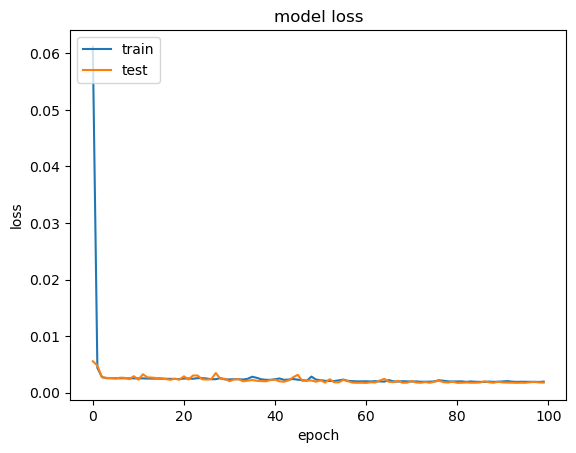

Saved model to disk as Skenario1LSTM-MHA.json and Skenario1LSTM-MHA.h5
 1/80 [..............................] - ETA: 1:08

W0000 00:00:1723699417.519787     774 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3050 Ti Laptop GPU" frequency: 1035 num_cores: 20 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "12020" } environment { key: "cudnn" value: "8904" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 2097152 shared_memory_size_per_multiprocessor: 102400 memory_size: 1838887732 bandwidth: 173120000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


1/1 [==============================] - 0s 43ms/step


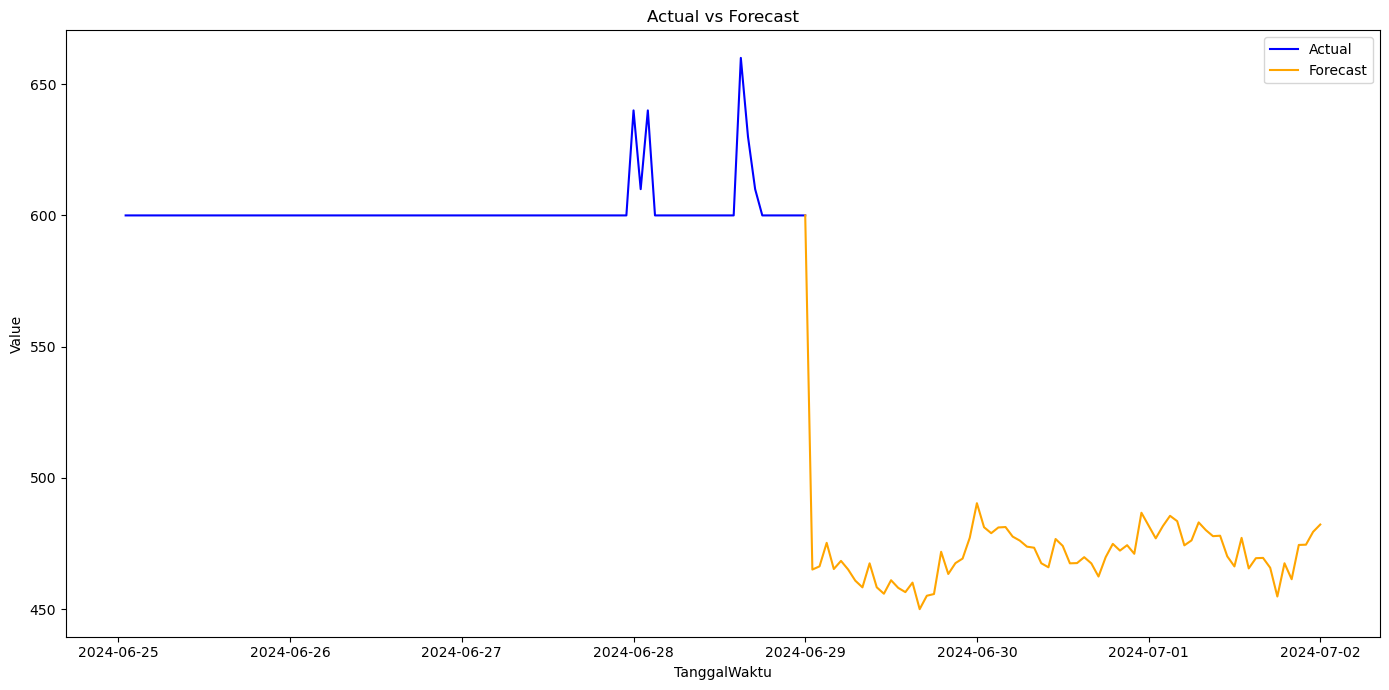

                     Actual    Forecast
TanggalWaktu                           
2024-06-29 01:00:00     NaN  465.110504
2024-06-29 02:00:00     NaN  466.319519
2024-06-29 03:00:00     NaN  475.279755
2024-06-29 04:00:00     NaN  465.306488
2024-06-29 05:00:00     NaN  468.408966
...                     ...         ...
2024-07-01 20:00:00     NaN  461.416870
2024-07-01 21:00:00     NaN  474.481262
2024-07-01 22:00:00     NaN  474.579895
2024-07-01 23:00:00     NaN  479.473175
2024-07-02 00:00:00     NaN  482.259033

[72 rows x 2 columns]
80/80 [==============================] - 2s 30ms/step
testing RMSE: 31.743873630482128
testing MAPE: 0.03271159127007918
testing SMAPE: 3.299053454590195
testing R-Squared: 0.4421362004984545
75/75 [==============================] - 2s 25ms/step


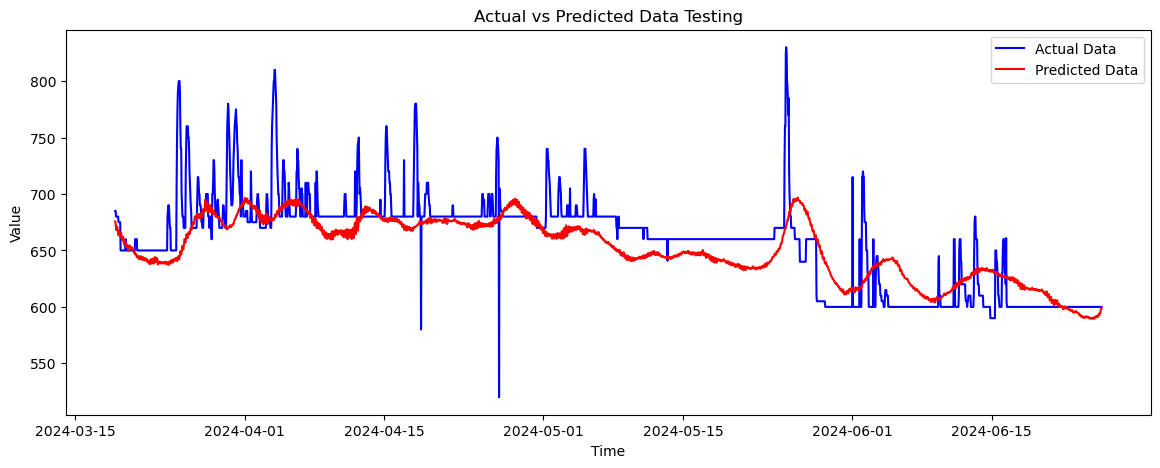

                       1
offset             168.0
num_features         5.0
units_1             96.0
units_2             96.0
drop_rate_1          0.2
drop_rate_2          0.2
no_of_outputs       72.0
epochs             100.0
batch_size         512.0
head_size           50.0
num_heads            4.0
attention_dropout    0.0


In [21]:

if __name__ == '__main__':

    #Import Data
    data_df = pd.read_excel('Kode/DataSemnas6Var.xlsx', index_col='TanggalWaktu', parse_dates=True)
    #data_df = pd.read_excel('DataSemnasFinal.xlsx', index_col='TanggalWaktu', parse_dates=True)
    #jika ingin running tanpa attention ganti dengan False
    att = True

    name = "Skenario1LSTM-MHA"
    #Defining the initial parameters of the model
    params = {
        'offset': 168,
        'num_features': 5,
        'units_1': 96,
        'units_2': 96,
        'drop_rate_1': 0.2,
        'drop_rate_2': 0.2,
        'no_of_outputs': 72,
        'epochs': 100,
        'batch_size': 512,
        'head_size': 50,
        'num_heads': 4,
        'attention_dropout': 0.0}

    result_df, model = run(data_df, params, name)
    
    #Printing the params and errors
    print(result_df)

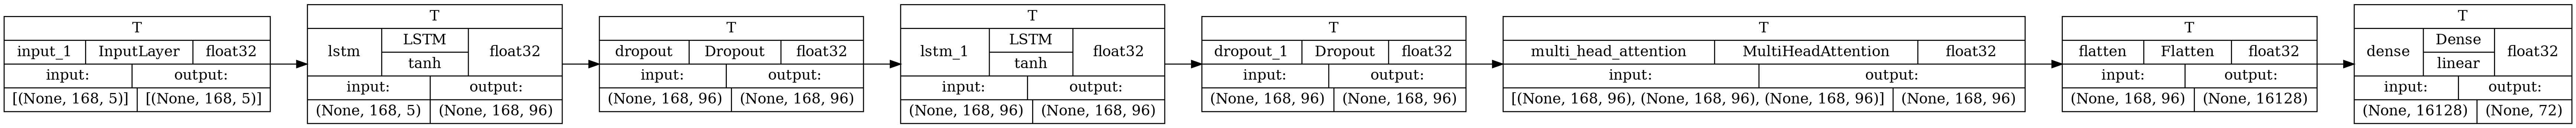

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True,show_layer_names=True,rankdir='LR',expand_nested=True,dpi=200,show_layer_activations=True,show_trainable=True)

Skenario 1 Tanpa Attention

New best validation loss at epoch 1: 0.0349
New best validation loss at epoch 2: 0.0124
New best validation loss at epoch 3: 0.0107
New best validation loss at epoch 4: 0.0101
New best validation loss at epoch 5: 0.0094
New best validation loss at epoch 6: 0.0093
New best validation loss at epoch 7: 0.0080
New best validation loss at epoch 8: 0.0077
New best validation loss at epoch 10: 0.0073
New best validation loss at epoch 15: 0.0068
New best validation loss at epoch 16: 0.0065
New best validation loss at epoch 17: 0.0063
New best validation loss at epoch 23: 0.0057
New best validation loss at epoch 25: 0.0033
New best validation loss at epoch 27: 0.0029


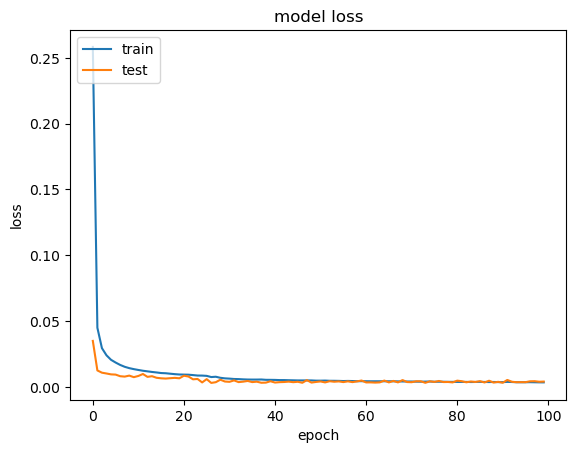

Saved model to disk as Skenario1LSTM.json and Skenario1LSTM.h5
1/1 [==============================] - 0s 64ms/step


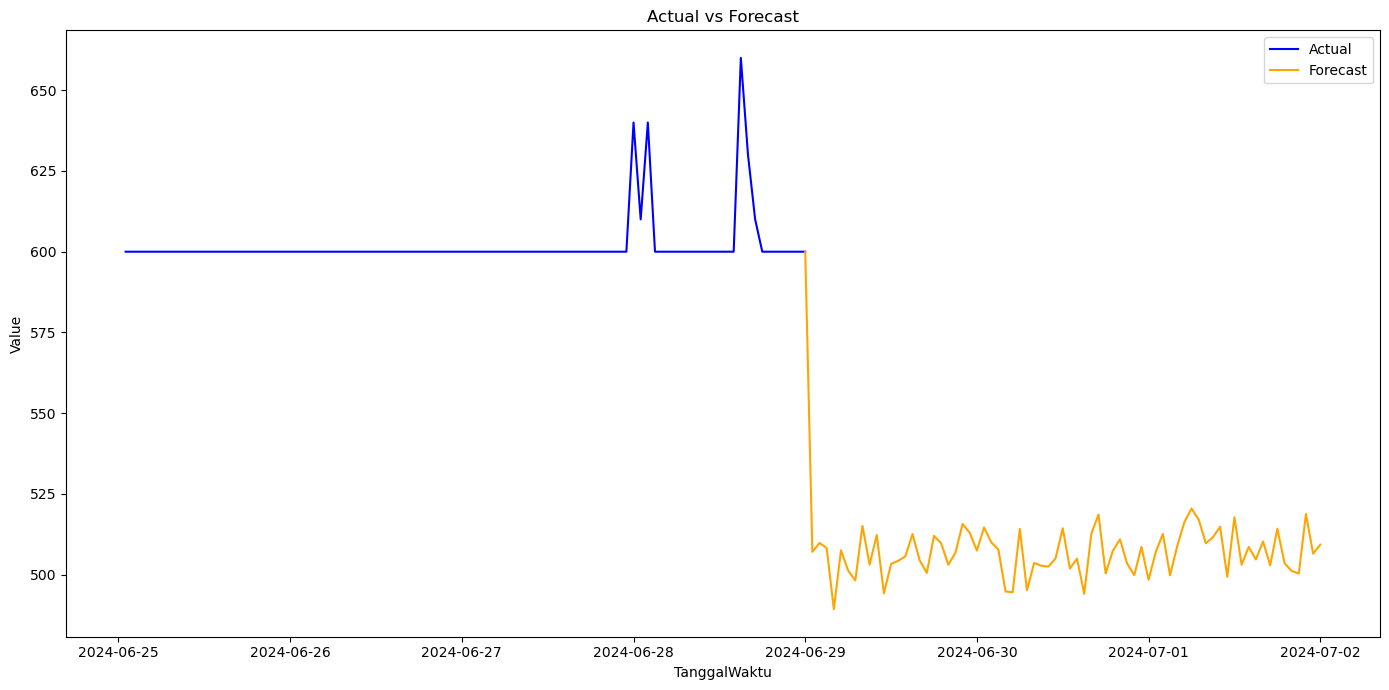

                     Actual    Forecast
TanggalWaktu                           
2024-06-29 01:00:00     NaN  507.071838
2024-06-29 02:00:00     NaN  509.824432
2024-06-29 03:00:00     NaN  508.274414
2024-06-29 04:00:00     NaN  489.333557
2024-06-29 05:00:00     NaN  507.571594
...                     ...         ...
2024-07-01 20:00:00     NaN  501.133484
2024-07-01 21:00:00     NaN  500.382141
2024-07-01 22:00:00     NaN  518.823120
2024-07-01 23:00:00     NaN  506.503052
2024-07-02 00:00:00     NaN  509.299774

[72 rows x 2 columns]
80/80 [==============================] - 2s 24ms/step
testing RMSE: 47.59029970461028
testing MAPE: 0.059710814288406036
testing SMAPE: 6.131400307374486
testing R-Squared: -0.253848939196224
75/75 [==============================] - 2s 22ms/step


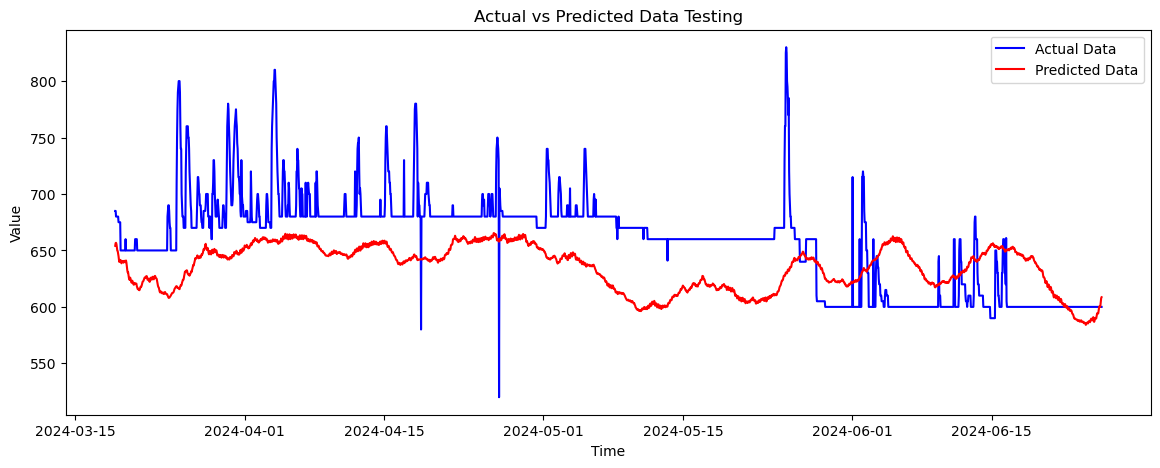

                       1
offset             168.0
num_features         5.0
units_1             96.0
units_2             96.0
drop_rate_1          0.2
drop_rate_2          0.2
no_of_outputs       72.0
epochs             100.0
batch_size         512.0
head_size           50.0
num_heads            4.0
attention_dropout    0.0


In [ ]:

if __name__ == '__main__':

    #Import Data
    data_df = pd.read_excel('Kode/DataSemnas6Var.xlsx', index_col='TanggalWaktu', parse_dates=True)
    #data_df = pd.read_excel('DataSemnasFinal.xlsx', index_col='TanggalWaktu', parse_dates=True)
    #jika ingin running tanpa attention ganti dengan False
    att = False

    name = "Skenario1LSTM"
    #Defining the initial parameters of the model
    params = {
        'offset': 168,
        'num_features': 5,
        'units_1': 96,
        'units_2': 96,
        'drop_rate_1': 0.2,
        'drop_rate_2': 0.2,
        'no_of_outputs': 72,
        'epochs': 100,
        'batch_size': 512,
        'head_size': 50,
        'num_heads': 4,
        'attention_dropout': 0.0}

    result_df, model = run(data_df, params, name)
    #Printing the params and errors
    print(result_df)

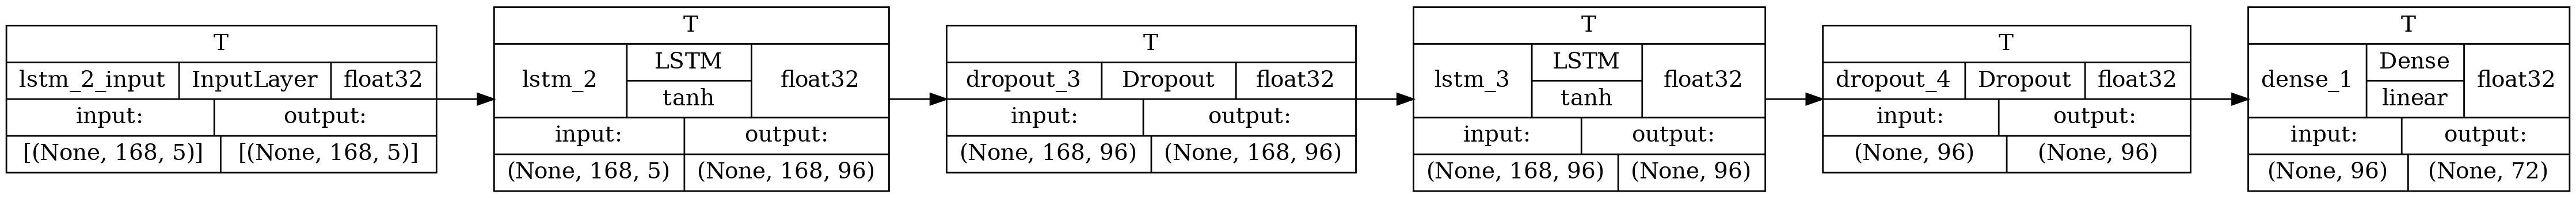

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True,show_layer_names=True,rankdir='LR',expand_nested=True,dpi=200,show_layer_activations=True,show_trainable=True)

In [ ]:
def run(data_df, params, name):

    # #Plot the data and check if there are any unexpected anamolies(sudden spikes or dips)
    # plt.figure(figsize=(16,8))
    # plt.plot(data_df['Manggarai BKB'], label='Perkembangan Tinggi Muka Air Sungai Ciliwung')
    # plt.title('Perkembangan Tinggi Muka Air')

    new_data = pd.DataFrame(index=range(0,len(data_df)),columns=['TanggalWaktu', 'Manggarai BKB','precipitation_rate','air_temp','relative_humidity'])
    for col in new_data.columns:
      if col == 'TanggalWaktu':
        for i in range(0,len(data_df)):
          new_data[col][i] = data_df.index[i]
      else:
        for i in range(0,len(data_df)):
          new_data[col][i] = data_df[col][i]

    #Variabel Date diubah menjadi index pada dataframe, lalu atributnya di Drop
    new_data.index = new_data.TanggalWaktu
    new_data.drop('TanggalWaktu', axis=1, inplace=True)

    #Pendefinisian ukuran splitting data dimana proporsi data train dinyatakan oleh variabel frac.
    frac = 0.8
    tl = int(len(new_data)*frac)

    dataset = new_data.values
    #Mengambil nilai baris pertama hingga baris tl sebagai data train dan sisanya sebagai validation set
    train = dataset[0:tl,:]
    valid = dataset[tl:,:]

    #Normalisasi data, disini menggunakan Min-Max scaler
    scaler = MinMaxScaler(feature_range=(0,1))
    scaler.fit(train)
    scaled_data_train = scaler.transform(train)
    scaled_data_valid = scaler.transform(valid)

    #Bangun Model LSTM
    if(att == True):
      model, history, X_test,Y_test, inputs= build_model_att(train,valid,new_data,scaler,params, scaled_data_train,scaled_data_valid)
    else:
      model, history, X_test, Y_test, inputs = build_model(train,valid,new_data,scaler,params, scaled_data_train,scaled_data_valid)
    save_trained_model(model,name)
    #Menghitung nilai Root Mean Square Error dan R-Square
    get_accuracy(train,valid,new_data,tl,scaler,model,X_test,scaled_data_valid,data_df,Y_test, inputs)

    #Menyimpan parameter yang digunakan dalam pemodelan
    params_items = params.items()
    params_list  = list(params_items)
    params_df = pd.DataFrame(params_list, index=params.keys())
    
    result_df = params_df
    result_df = result_df.drop([0], axis=1)
    # `rankdir='LR'` is to make the graph horizontal.

    return result_df, model

Skenario 2 Attention

W0000 00:00:1723688525.765384     752 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3050 Ti Laptop GPU" frequency: 1035 num_cores: 20 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "12020" } environment { key: "cudnn" value: "8904" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 2097152 shared_memory_size_per_multiprocessor: 102400 memory_size: 1838887732 bandwidth: 173120000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
W0000 00:00:1723688531.835668     752 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3050 Ti Laptop GPU" frequency: 103

New best validation loss at epoch 1: 0.0177
New best validation loss at epoch 2: 0.0031
New best validation loss at epoch 3: 0.0022
New best validation loss at epoch 4: 0.0022
New best validation loss at epoch 7: 0.0021
New best validation loss at epoch 11: 0.0021
New best validation loss at epoch 14: 0.0021
New best validation loss at epoch 15: 0.0021
New best validation loss at epoch 18: 0.0021
New best validation loss at epoch 19: 0.0021
New best validation loss at epoch 22: 0.0021
New best validation loss at epoch 24: 0.0021
New best validation loss at epoch 26: 0.0021
New best validation loss at epoch 35: 0.0021
New best validation loss at epoch 36: 0.0021
New best validation loss at epoch 37: 0.0021
New best validation loss at epoch 40: 0.0020
New best validation loss at epoch 45: 0.0020
New best validation loss at epoch 48: 0.0020
New best validation loss at epoch 51: 0.0020
New best validation loss at epoch 61: 0.0020
New best validation loss at epoch 75: 0.0020
New best valida

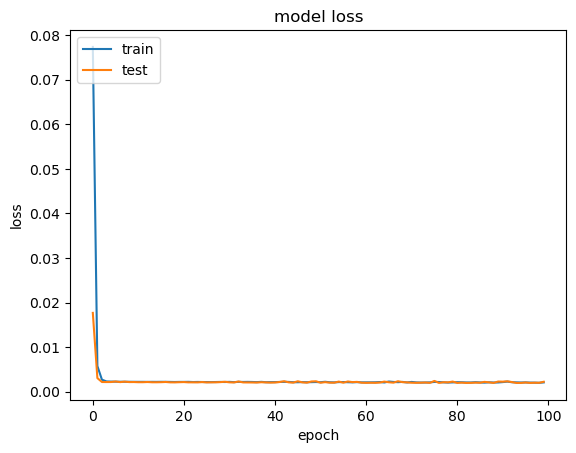

Saved model to disk as Skenario2LSTM-MHA.json and Skenario2LSTM-MHA.h5
 1/80 [..............................] - ETA: 1:21

W0000 00:00:1723688917.537539     752 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3050 Ti Laptop GPU" frequency: 1035 num_cores: 20 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "12020" } environment { key: "cudnn" value: "8904" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 2097152 shared_memory_size_per_multiprocessor: 102400 memory_size: 1838887732 bandwidth: 173120000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


1/1 [==============================] - 0s 58ms/step


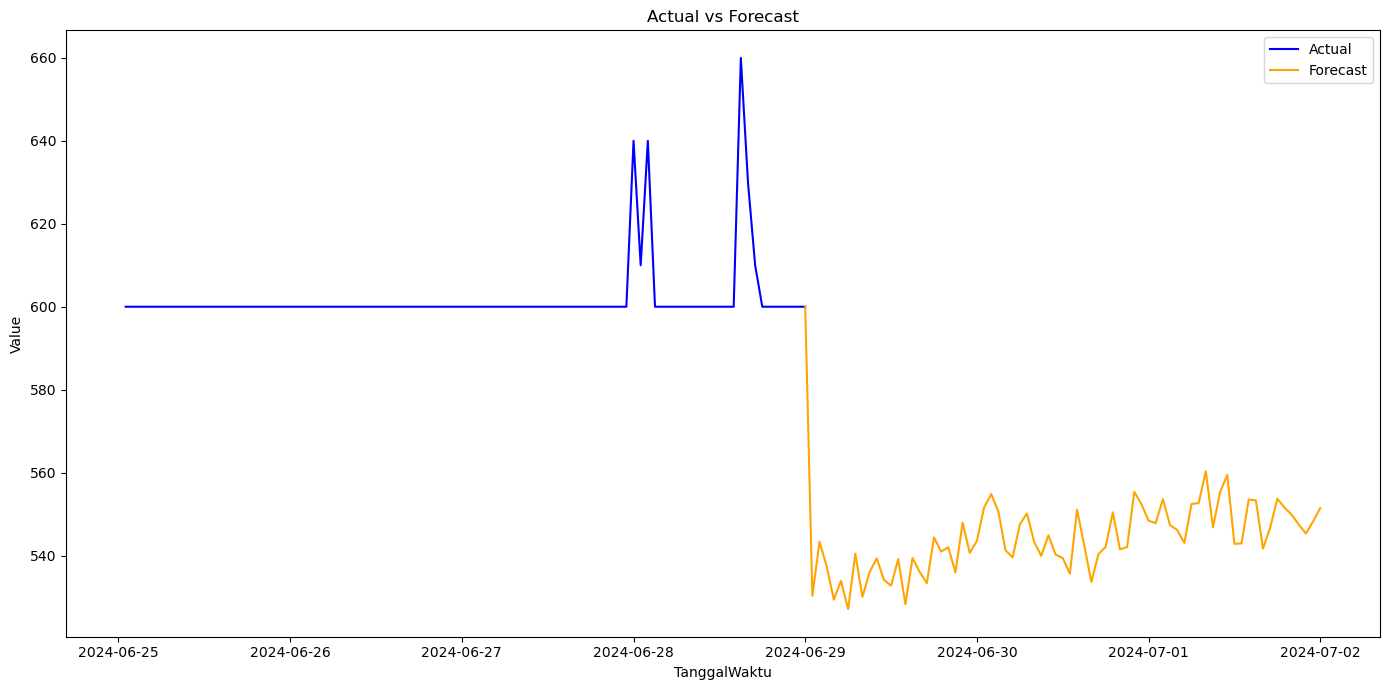

                     Actual    Forecast
TanggalWaktu                           
2024-06-29 01:00:00     NaN  530.302856
2024-06-29 02:00:00     NaN  543.327515
2024-06-29 03:00:00     NaN  537.385620
2024-06-29 04:00:00     NaN  529.367188
2024-06-29 05:00:00     NaN  533.918762
...                     ...         ...
2024-07-01 20:00:00     NaN  549.854492
2024-07-01 21:00:00     NaN  547.461487
2024-07-01 22:00:00     NaN  545.314148
2024-07-01 23:00:00     NaN  548.231384
2024-07-02 00:00:00     NaN  551.456177

[72 rows x 2 columns]
80/80 [==============================] - 3s 31ms/step
testing RMSE: 35.65974362781092
testing MAPE: 0.0389925302455963
testing SMAPE: 3.962913006552118
testing R-Squared: 0.29601278787868857
                    Manggarai BKB precipitation_rate air_temp  \
TanggalWaktu                                                    
2024-03-12 00:00:00           650                0.5       26   
2024-03-12 01:00:00           650                0.3       26   
2024-0

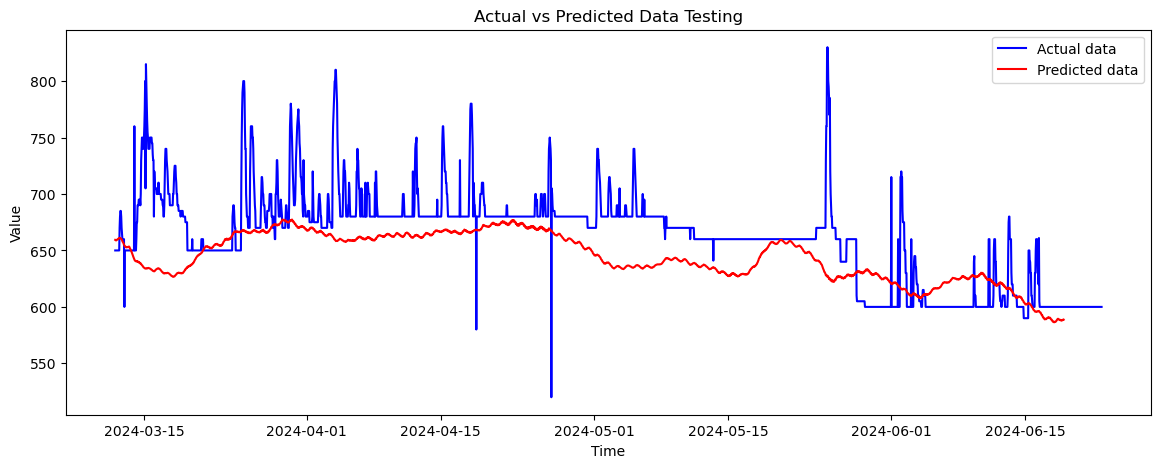

                       1
offset             168.0
num_features         4.0
units_1             96.0
units_2             96.0
drop_rate_1          0.2
drop_rate_2          0.2
no_of_outputs       72.0
epochs             100.0
batch_size         512.0
head_size           50.0
num_heads            4.0
attention_dropout    0.0


In [ ]:

if __name__ == '__main__':

    #Import Data
    #data_df = pd.read_excel('Kode/DataSemnas6Var.xlsx', index_col='TanggalWaktu', parse_dates=True)
    #data_df = pd.read_excel('DataSemnasFinal.xlsx', index_col='TanggalWaktu', parse_dates=True)
    #jika ingin running tanpa attention ganti dengan False
    att = True

    name = "Skenario2LSTM-MHA"
    #Defining the initial parameters of the model
    params = {
        'offset': 168,
        'num_features': 4,
        'units_1': 96,
        'units_2': 96,
        'drop_rate_1': 0.2,
        'drop_rate_2': 0.2,
        'no_of_outputs': 72,
        'epochs': 100,
        'batch_size': 512,
        'head_size': 50,
        'num_heads': 4,
        'attention_dropout': 0.0}

    result_df, model = run(data_df, params, name)
    
    #Printing the params and errors
    print(result_df)

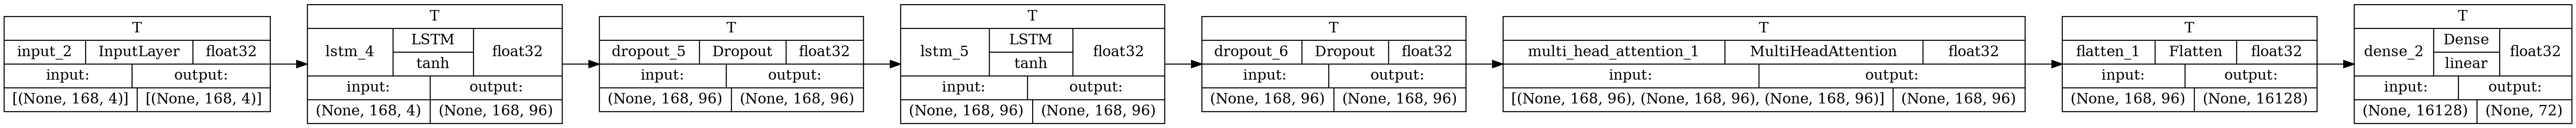

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True,show_layer_names=True,rankdir='LR',expand_nested=True,dpi=200,show_layer_activations=True,show_trainable=True)


Skenario 2 Tanpa Attention

New best validation loss at epoch 1: 0.0149
New best validation loss at epoch 2: 0.0073
New best validation loss at epoch 3: 0.0065
New best validation loss at epoch 4: 0.0062
New best validation loss at epoch 5: 0.0053
New best validation loss at epoch 6: 0.0044
New best validation loss at epoch 12: 0.0036
New best validation loss at epoch 18: 0.0034
New best validation loss at epoch 39: 0.0029
New best validation loss at epoch 71: 0.0029
New best validation loss at epoch 91: 0.0029
New best validation loss at epoch 94: 0.0028


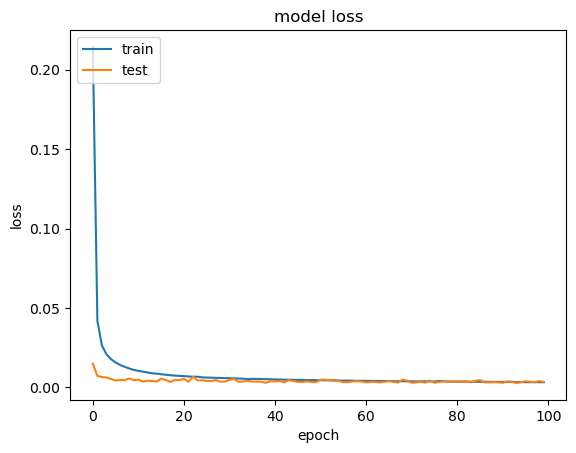

Saved model to disk as Skenario2LSTM.json and Skenario2LSTM.h5
1/1 [==============================] - 0s 58ms/step


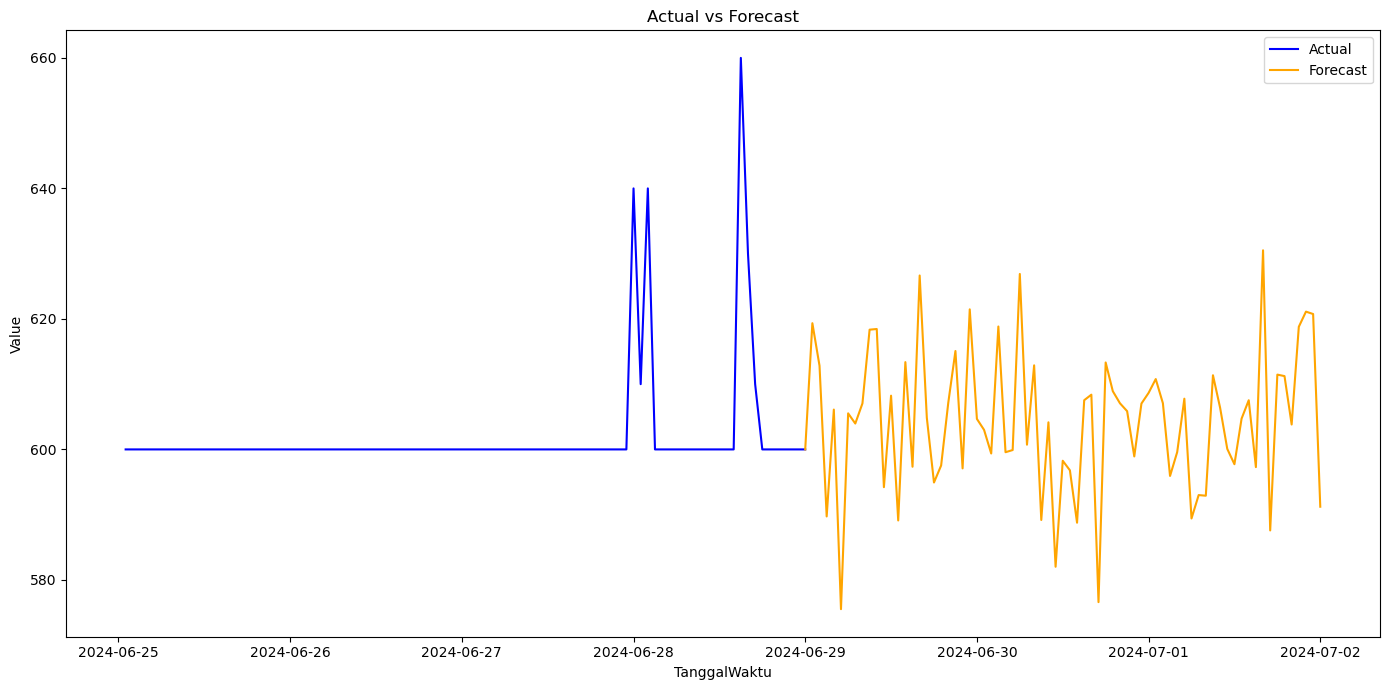

                     Actual    Forecast
TanggalWaktu                           
2024-06-29 01:00:00     NaN  619.341614
2024-06-29 02:00:00     NaN  612.821350
2024-06-29 03:00:00     NaN  589.727783
2024-06-29 04:00:00     NaN  606.105469
2024-06-29 05:00:00     NaN  575.519897
...                     ...         ...
2024-07-01 20:00:00     NaN  603.818054
2024-07-01 21:00:00     NaN  618.792664
2024-07-01 22:00:00     NaN  621.115173
2024-07-01 23:00:00     NaN  620.749573
2024-07-02 00:00:00     NaN  591.219055

[72 rows x 2 columns]
80/80 [==============================] - 2s 27ms/step
testing RMSE: 44.52933289467252
testing MAPE: 0.05573214394084684
testing SMAPE: 5.69932467891479
testing R-Squared: -0.09774309760106004
                    Manggarai BKB precipitation_rate air_temp  \
TanggalWaktu                                                    
2024-03-12 00:00:00           650                0.5       26   
2024-03-12 01:00:00           650                0.3       26   
2024-

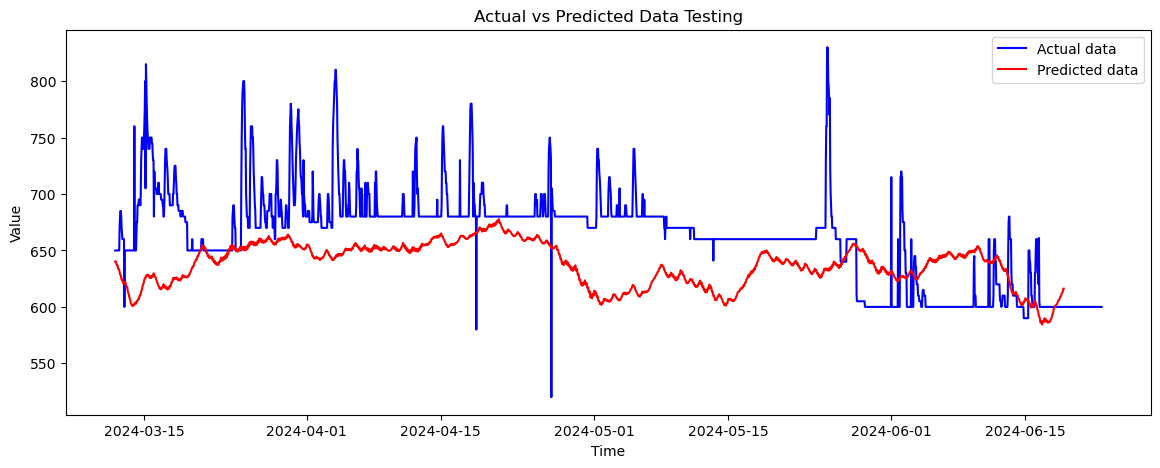

                       1
offset             168.0
num_features         4.0
units_1             96.0
units_2             96.0
drop_rate_1          0.2
drop_rate_2          0.2
no_of_outputs       72.0
epochs             100.0
batch_size         512.0
head_size           50.0
num_heads            4.0
attention_dropout    0.0


In [ ]:

if __name__ == '__main__':

    #Import Data
    #data_df = pd.read_excel('Kode/DataSemnas6Var.xlsx', index_col='TanggalWaktu', parse_dates=True)
    #data_df = pd.read_excel('DataSemnasFinal.xlsx', index_col='TanggalWaktu', parse_dates=True)
    #jika ingin running tanpa attention ganti dengan False
    att = False

    name = "Skenario2LSTM"
    #Defining the initial parameters of the model
    params = {
        'offset': 168,
        'num_features': 4,
        'units_1': 96,
        'units_2': 96,
        'drop_rate_1': 0.2,
        'drop_rate_2': 0.2,
        'no_of_outputs': 72,
        'epochs': 100,
        'batch_size': 512,
        'head_size': 50,
        'num_heads': 4,
        'attention_dropout': 0.0}

    result_df, model = run(data_df, params, name)
    
    #Printing the params and errors
    print(result_df)

In [ ]:
def run(data_df, params, name):

    # #Plot the data and check if there are any unexpected anamolies(sudden spikes or dips)
    # plt.figure(figsize=(16,8))
    # plt.plot(data_df['Manggarai BKB'], label='Perkembangan Tinggi Muka Air Sungai Ciliwung')
    # plt.title('Perkembangan Tinggi Muka Air')

    new_data = pd.DataFrame(index=range(0,len(data_df)),columns=['TanggalWaktu', 'Manggarai BKB','precipitation_rate','air_temp'])
    for col in new_data.columns:
      if col == 'TanggalWaktu':
        for i in range(0,len(data_df)):
          new_data[col][i] = data_df.index[i]
      else:
        for i in range(0,len(data_df)):
          new_data[col][i] = data_df[col][i]

    #Variabel Date diubah menjadi index pada dataframe, lalu atributnya di Drop
    new_data.index = new_data.TanggalWaktu
    new_data.drop('TanggalWaktu', axis=1, inplace=True)

    #Pendefinisian ukuran splitting data dimana proporsi data train dinyatakan oleh variabel frac.
    frac = 0.8
    tl = int(len(new_data)*frac)

    dataset = new_data.values
    #Mengambil nilai baris pertama hingga baris tl sebagai data train dan sisanya sebagai validation set
    train = dataset[0:tl,:]
    valid = dataset[tl:,:]

    #Normalisasi data, disini menggunakan Min-Max scaler
    scaler = MinMaxScaler(feature_range=(0,1))
    scaler.fit(train)
    scaled_data_train = scaler.transform(train)
    scaled_data_valid = scaler.transform(valid)

    #Bangun Model LSTM
    if(att == True):
      model, history, X_test,Y_test, inputs= build_model_att(train,valid,new_data,scaler,params, scaled_data_train,scaled_data_valid)
    else:
      model, history, X_test, Y_test, inputs = build_model(train,valid,new_data,scaler,params, scaled_data_train,scaled_data_valid)
    save_trained_model(model,name)
    #Menghitung nilai Root Mean Square Error dan R-Square
    get_accuracy(train,valid,new_data,tl,scaler,model,X_test,scaled_data_valid,data_df,Y_test, inputs)

    #Menyimpan parameter yang digunakan dalam pemodelan
    params_items = params.items()
    params_list  = list(params_items)
    params_df = pd.DataFrame(params_list, index=params.keys())
    
    result_df = params_df
    result_df = result_df.drop([0], axis=1)
    
    return result_df, model

Skenario 3 Attention

W0000 00:00:1723689140.708114     752 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3050 Ti Laptop GPU" frequency: 1035 num_cores: 20 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "12020" } environment { key: "cudnn" value: "8904" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 2097152 shared_memory_size_per_multiprocessor: 102400 memory_size: 1838887732 bandwidth: 173120000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
W0000 00:00:1723689146.861203     752 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3050 Ti Laptop GPU" frequency: 103

New best validation loss at epoch 1: 0.0528
New best validation loss at epoch 2: 0.0053
New best validation loss at epoch 3: 0.0031
New best validation loss at epoch 4: 0.0026
New best validation loss at epoch 5: 0.0023
New best validation loss at epoch 16: 0.0023
New best validation loss at epoch 18: 0.0022
New best validation loss at epoch 23: 0.0022
New best validation loss at epoch 25: 0.0021
New best validation loss at epoch 26: 0.0021
New best validation loss at epoch 27: 0.0020
New best validation loss at epoch 31: 0.0020
New best validation loss at epoch 33: 0.0020
New best validation loss at epoch 35: 0.0018
New best validation loss at epoch 42: 0.0018
New best validation loss at epoch 44: 0.0017
New best validation loss at epoch 50: 0.0017


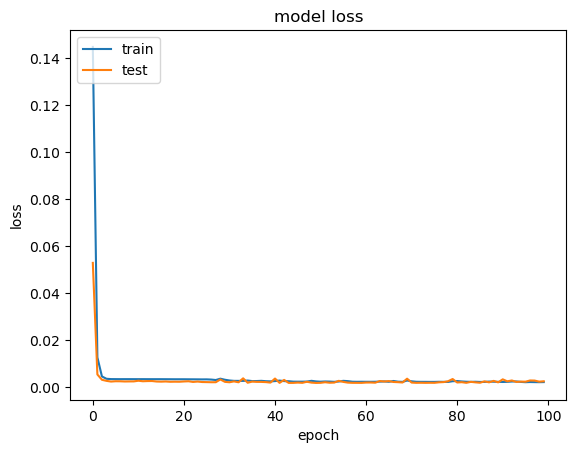

Saved model to disk as Skenario3LSTM-MHA.json and Skenario3LSTM-MHA.h5


W0000 00:00:1723689561.808450     752 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3050 Ti Laptop GPU" frequency: 1035 num_cores: 20 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "12020" } environment { key: "cudnn" value: "8904" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 2097152 shared_memory_size_per_multiprocessor: 102400 memory_size: 1838887732 bandwidth: 173120000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


1/1 [==============================] - 0s 49ms/step


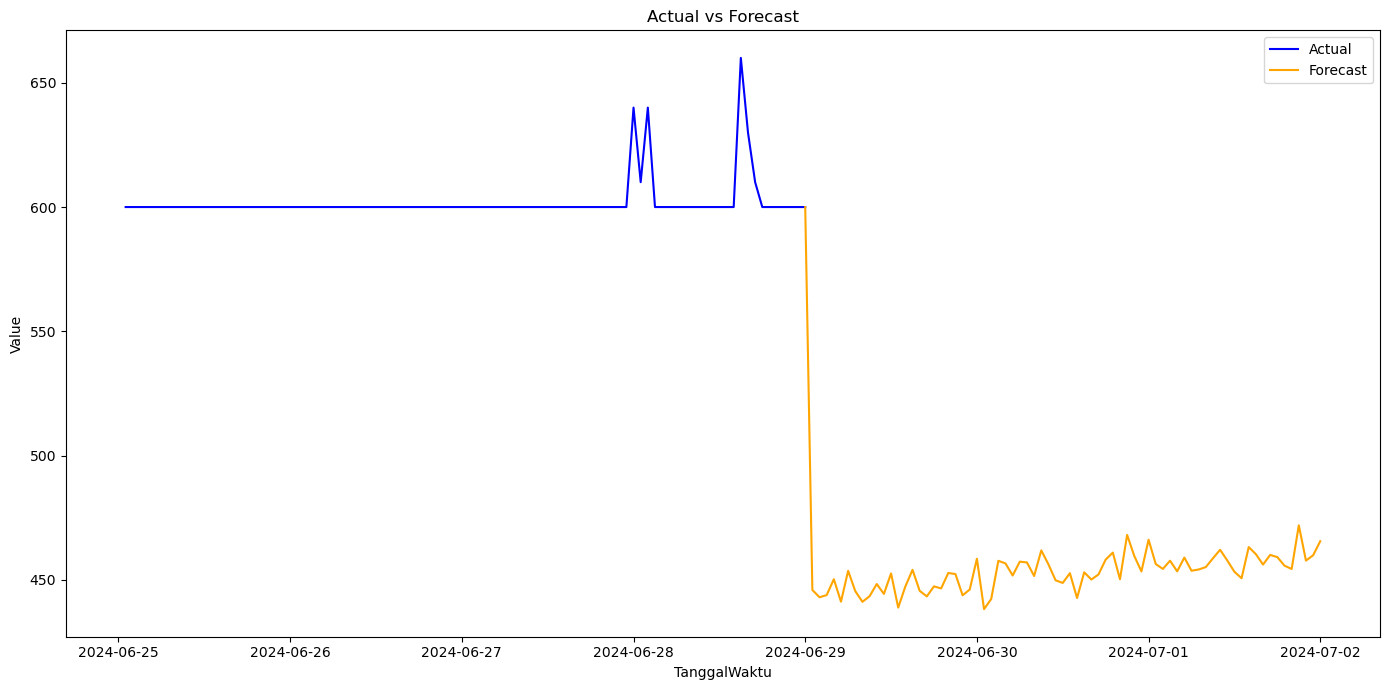

                     Actual    Forecast
TanggalWaktu                           
2024-06-29 01:00:00     NaN  445.965057
2024-06-29 02:00:00     NaN  443.019409
2024-06-29 03:00:00     NaN  443.906921
2024-06-29 04:00:00     NaN  450.277954
2024-06-29 05:00:00     NaN  441.251953
...                     ...         ...
2024-07-01 20:00:00     NaN  454.402313
2024-07-01 21:00:00     NaN  471.972504
2024-07-01 22:00:00     NaN  457.775696
2024-07-01 23:00:00     NaN  459.910400
2024-07-02 00:00:00     NaN  465.584320

[72 rows x 2 columns]
80/80 [==============================] - 3s 36ms/step
testing RMSE: 37.319060927487605
testing MAPE: 0.038475145335170734
testing SMAPE: 3.9163391802370904
testing R-Squared: 0.22897270796354463
                    Manggarai BKB precipitation_rate air_temp
TanggalWaktu                                                 
2024-03-12 00:00:00           650                0.5       26
2024-03-12 01:00:00           650                0.3       26
2024-03-12 02:

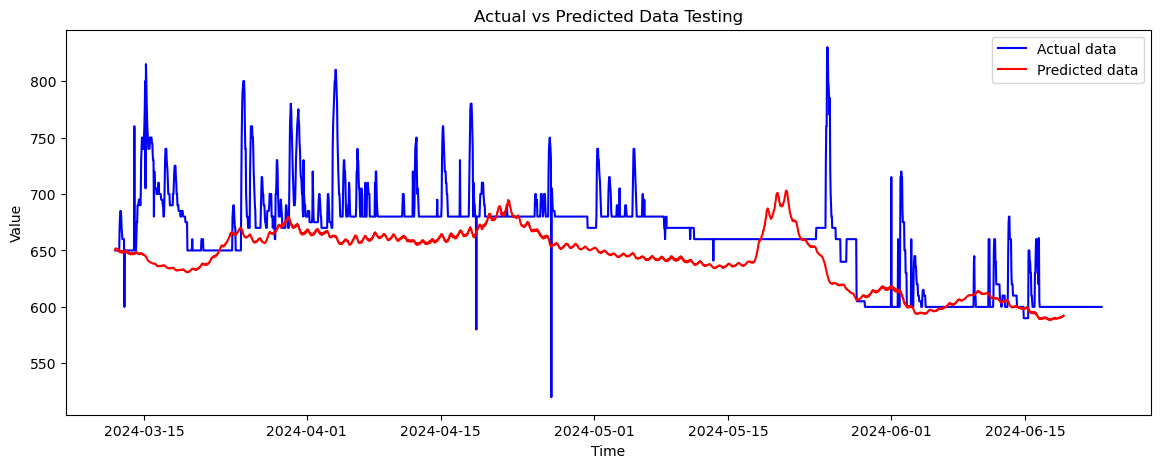

                       1
offset             168.0
num_features         3.0
units_1             96.0
units_2             96.0
drop_rate_1          0.2
drop_rate_2          0.2
no_of_outputs       72.0
epochs             100.0
batch_size         512.0
head_size           50.0
num_heads            4.0
attention_dropout    0.0


In [ ]:

if __name__ == '__main__':

    #Import Data
    #data_df = pd.read_excel('Kode/DataSemnas6Var.xlsx', index_col='TanggalWaktu', parse_dates=True)
    #data_df = pd.read_excel('DataSemnasFinal.xlsx', index_col='TanggalWaktu', parse_dates=True)
    #jika ingin running tanpa attention ganti dengan False
    att = True

    name = "Skenario3LSTM-MHA"
    #Defining the initial parameters of the model
    params = {
        'offset': 168,
        'num_features': 3,
        'units_1': 96,
        'units_2': 96,
        'drop_rate_1': 0.2,
        'drop_rate_2': 0.2,
        'no_of_outputs': 72,
        'epochs': 100,
        'batch_size': 512,
        'head_size': 50,
        'num_heads': 4,
        'attention_dropout': 0.0}

    result_df, model = run(data_df, params, name)
    #tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True,show_layer_names=True,rankdir='LR',expand_nested=True,dpi=200,show_layer_activations=True,show_trainable=True)

    #Printing the params and errors
    print(result_df)

New best validation loss at epoch 1: 0.0248
New best validation loss at epoch 2: 0.0099
New best validation loss at epoch 3: 0.0087
New best validation loss at epoch 9: 0.0072
New best validation loss at epoch 24: 0.0065
New best validation loss at epoch 33: 0.0062
New best validation loss at epoch 72: 0.0032


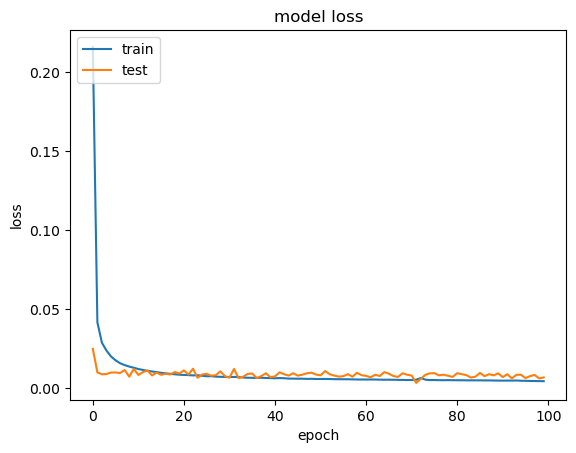

Saved model to disk as Skenario3LSTM.json and Skenario3LSTM.h5
1/1 [==============================] - 0s 42ms/step


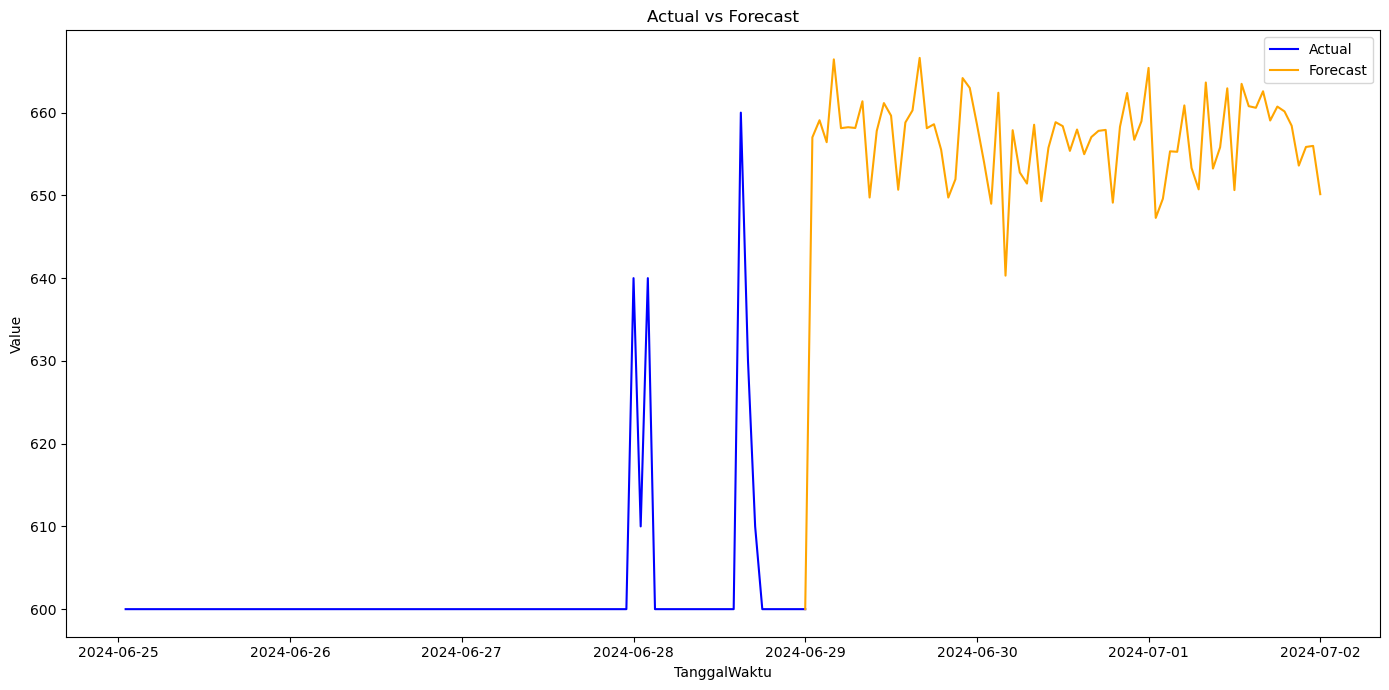

                     Actual    Forecast
TanggalWaktu                           
2024-06-29 01:00:00     NaN  657.013184
2024-06-29 02:00:00     NaN  659.080994
2024-06-29 03:00:00     NaN  656.426270
2024-06-29 04:00:00     NaN  666.436218
2024-06-29 05:00:00     NaN  658.124939
...                     ...         ...
2024-07-01 20:00:00     NaN  658.415894
2024-07-01 21:00:00     NaN  653.601257
2024-07-01 22:00:00     NaN  655.853455
2024-07-01 23:00:00     NaN  655.980042
2024-07-02 00:00:00     NaN  650.146545

[72 rows x 2 columns]
80/80 [==============================] - 2s 22ms/step
testing RMSE: 61.71290291556291
testing MAPE: 0.07665632199037688
testing SMAPE: 8.05808645647599
testing R-Squared: -1.1084353481398685
                    Manggarai BKB precipitation_rate air_temp
TanggalWaktu                                                 
2024-03-12 00:00:00           650                0.5       26
2024-03-12 01:00:00           650                0.3       26
2024-03-12 02:00:0

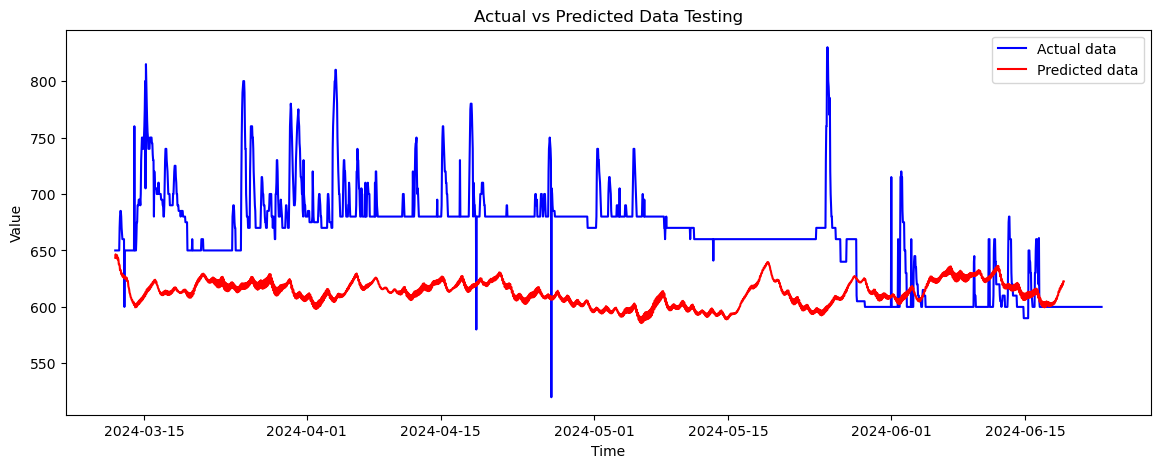

                       1
offset             168.0
num_features         3.0
units_1             96.0
units_2             96.0
drop_rate_1          0.2
drop_rate_2          0.2
no_of_outputs       72.0
epochs             100.0
batch_size         512.0
head_size           50.0
num_heads            4.0
attention_dropout    0.0


In [ ]:

if __name__ == '__main__':

    #Import Data
    #data_df = pd.read_excel('Kode/DataSemnas6Var.xlsx', index_col='TanggalWaktu', parse_dates=True)
    #data_df = pd.read_excel('DataSemnasFinal.xlsx', index_col='TanggalWaktu', parse_dates=True)
    #jika ingin running tanpa attention ganti dengan False
    att = False

    name = "Skenario3LSTM"
    #Defining the initial parameters of the model
    params = {
        'offset': 168,
        'num_features': 3,
        'units_1': 96,
        'units_2': 96,
        'drop_rate_1': 0.2,
        'drop_rate_2': 0.2,
        'no_of_outputs': 72,
        'epochs': 100,
        'batch_size': 512,
        'head_size': 50,
        'num_heads': 4,
        'attention_dropout': 0.0}

    result_df, model = run(data_df, params, name)
    #tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True,show_layer_names=True,rankdir='LR',expand_nested=True,dpi=200,show_layer_activations=True,show_trainable=True)
    #Printing the params and errors
    print(result_df)